In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("C:/Users/asd11/OneDrive/桌面/政大數據分析/專案/交通意外縮減.csv")
data.head(4)

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,1810832,A-1810833,2020-09-24 12:22:03,2020-09-24 13:37:04,33.859766,-118.295255,33.859096,-118.289705,0.322,Gardena,...,False,False,False,False,False,Day,Day,Day,Day,2
1,1612482,A-1612483,2021-02-19 09:03:00,2021-02-19 14:45:00,34.619095,-87.008040,34.619097,-87.008166,0.007,Decatur,...,False,False,False,False,False,Day,Day,Day,Day,2
2,2209729,A-2209730,2020-03-20 18:03:03,2020-03-20 18:38:01,35.091940,-80.856370,35.091940,-80.856370,0.000,Charlotte,...,False,False,False,True,False,Day,Day,Day,Day,2
3,2721311,A-2721312,2017-12-20 12:13:48,2017-12-20 18:13:48,34.067360,-117.431140,34.067130,-117.440890,0.558,Bloomington,...,False,False,False,False,False,Day,Day,Day,Day,2


In [55]:
print(1)

1


## 1. 嚴重性二分為輕度和重度(完成)
## 2. 以weather condition和嚴重性做堆疊長條圖
## 3. visibility和雨量、氣壓、風速等連續型天氣資料的關係
## 4. 白天夜晚跟嚴重性的關係
## 5. 道路的各欄位分別和嚴重性的關係

# 資料前處理

In [3]:
def clean(data) :
    
    #嚴重性分級
    severity = []
    for i in data['Severity'] :
        try :
            if i < 3 :
                severity.append('輕度')
            else :
                severity.append('重度')
        except :
            severity.append('無資料')
    data['Severity'] = severity

In [4]:
data.isnull().sum()

Unnamed: 0                    0
ID                            0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
City                         85
County                        0
State                         0
Zipcode                     768
Country                       0
Timezone                   2183
Airport_Code               5754
Weather_Timestamp         30389
Temperature(F)            41602
Wind_Chill(F)            281803
Humidity(%)               43836
Pressure(in)              35499
Visibility(mi)            42201
Wind_Direction            44253
Wind_Speed(mph)           94724
Precipitation(in)        329738
Weather_Condition         42358
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit 

In [4]:
severity = []
for i in data['Severity'] :
    try :
        if i < 3 :
            severity.append('輕度')
        else :
            severity.append('重度')
    except :
        severity.append('無資料')
data['Severity'] = severity

# Weather_Timestamp沒記錄到的其他天氣數值也沒被記錄(刪掉?)


In [10]:
#timestamp
data['Weather_Timestamp'].fillna('nan',inplace=True)
for i in range(len(data)) :
    if data.loc[i,'Weather_Timestamp'] == 'nan' :
        print(data.loc[i,:])
        break   

Unnamed: 0                           1704869
ID                                 A-1704870
Start_Time               2021-02-04 20:06:00
End_Time                 2021-02-05 02:25:30
Start_Lat                           36.93587
Start_Lng                         -76.265139
End_Lat                            36.946677
End_Lng                           -76.266211
Distance(mi)                           0.749
City                                 Norfolk
County                               Norfolk
State                                     VA
Zipcode                           23503-4811
Country                                   US
Timezone                          US/Eastern
Airport_Code                             NaN
Weather_Timestamp                        nan
Temperature(F)                           NaN
Wind_Chill(F)                            NaN
Humidity(%)                              NaN
Pressure(in)                             NaN
Visibility(mi)                           NaN
Wind_Direc

In [6]:
#雨量前處理
data['Precipitation(in)'].fillna('nan',inplace=True)
condition = {}
for i in range(len(data)//2) :
    if data.loc[i,'Precipitation(in)'] == 'nan' :
        if data.loc[i,'Weather_Condition'] in condition :
            condition[data.loc[i,'Weather_Condition']] += 1
        else :
            condition[data.loc[i,'Weather_Condition']] = 1

for i in range(len(data)//2,len(data)) :
    if data.loc[i,'Precipitation(in)'] == 'nan' :
        if data.loc[i,'Weather_Condition'] in condition :
            condition[data.loc[i,'Weather_Condition']] += 1
        else :
            condition[data.loc[i,'Weather_Condition']] = 1

print(condition)

{'Clear': 103539, 'Scattered Clouds': 26436, 'Overcast': 43664, 'Partly Cloudy': 30771, 'Mostly Cloudy': 43233, 'Cloudy': 5332, 'Fair': 27094, nan: 34860, 'Light Rain': 2317, 'Smoke': 696, 'Thunderstorm': 429, 'Heavy Rain': 152, 'Haze': 3971, 'Light Snow': 1292, 'Fog': 1934, 'Mist': 259, 'Fair / Windy': 277, 'Rain': 1316, 'Light Rain / Windy': 37, 'Shallow Fog': 84, 'Light Drizzle': 364, 'Thunderstorms and Rain': 56, 'Snow': 215, 'Drizzle': 167, 'Patches of Fog': 165, 'Cloudy / Windy': 106, 'Heavy Drizzle': 10, 'Light Freezing Rain': 41, 'Funnel Cloud': 2, 'Heavy Snow': 56, 'Light Freezing Fog': 211, 'Light Rain Shower': 24, 'Light Thunderstorms and Rain': 90, 'Heavy Thunderstorms and Rain': 26, 'Showers in the Vicinity': 96, 'Mostly Cloudy / Windy': 43, 'Partly Cloudy / Windy': 44, 'Thunder': 12, 'Thunder in the Vicinity': 38, 'Light Freezing Drizzle': 14, 'T-Storm': 42, 'Rain Showers': 19, 'Light Rain with Thunder': 13, 'N/A Precipitation': 13, 'Volcanic Ash': 2, 'Blowing Snow': 33, 

In [ ]:
clean(data)

In [6]:
data.head()

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,1810832,A-1810833,2020-09-24 12:22:03,2020-09-24 13:37:04,33.859766,-118.295255,33.859096,-118.289705,0.322,Gardena,...,False,False,False,False,False,Day,Day,Day,Day,輕度
1,1612482,A-1612483,2021-02-19 09:03:00,2021-02-19 14:45:00,34.619095,-87.008040,34.619097,-87.008166,0.007,Decatur,...,False,False,False,False,False,Day,Day,Day,Day,輕度
2,2209729,A-2209730,2020-03-20 18:03:03,2020-03-20 18:38:01,35.091940,-80.856370,35.091940,-80.856370,0.000,Charlotte,...,False,False,False,True,False,Day,Day,Day,Day,輕度
3,2721311,A-2721312,2017-12-20 12:13:48,2017-12-20 18:13:48,34.067360,-117.431140,34.067130,-117.440890,0.558,Bloomington,...,False,False,False,False,False,Day,Day,Day,Day,輕度
4,1480039,A-1480040,2021-05-28 17:36:57,2021-05-28 17:47:53,34.314111,-86.902209,34.284021,-86.904779,2.084,Falkville,...,False,False,False,False,False,Day,Day,Day,Day,輕度


# ID、index都不一樣

In [3]:
len(data['ID'].unique()) == len(data)

True

In [4]:
len(data.index.unique()) == len(data)

True

# 同一場車禍

In [5]:
column_names = ['Start_Time', 'End_Time', 'City', 'County']
df = data[data.duplicated(subset=column_names, keep=False)] 
sort_df = df.sort_values(by='Start_Time')

In [6]:
sort_df.iloc[1,:] == sort_df.iloc[0,:]

Unnamed: 0               False
ID                       False
Start_Time                True
End_Time                  True
Start_Lat                False
Start_Lng                False
End_Lat                  False
End_Lng                  False
Distance(mi)             False
City                      True
County                    True
State                     True
Zipcode                   True
Country                   True
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)            False
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)          False
Precipitation(in)         True
Weather_Condition         True
Amenity                   True
Bump                      True
Crossing                  True
Give_Way                  True
Junction                  True
No_Exit                   True
Railway 

In [7]:
sort_df.iloc[0,:]

Unnamed: 0                                17
ID                                      A-18
Start_Time               2016-02-08 19:47:42
End_Time                 2016-02-09 01:47:42
Start_Lat                            39.9838
Start_Lng                          -82.85657
End_Lat                              39.9725
End_Lng                            -82.84746
Distance(mi)                           0.918
City                                Columbus
County                              Franklin
State                                     OH
Zipcode                                43213
Country                                   US
Timezone                          US/Eastern
Airport_Code                            KCMH
Weather_Timestamp        2016-02-08 19:51:00
Temperature(F)                          34.0
Wind_Chill(F)                            NaN
Humidity(%)                            100.0
Pressure(in)                           29.65
Visibility(mi)                           6.0
Wind_Direc

In [8]:
sort_df.iloc[1,:]

Unnamed: 0                                16
ID                                      A-17
Start_Time               2016-02-08 19:47:42
End_Time                 2016-02-09 01:47:42
Start_Lat                           39.97241
Start_Lng                          -82.84695
End_Lat                             39.98529
End_Lng                            -82.85667
Distance(mi)                           1.028
City                                Columbus
County                              Franklin
State                                     OH
Zipcode                                43213
Country                                   US
Timezone                          US/Eastern
Airport_Code                            KCMH
Weather_Timestamp        2016-02-08 19:51:00
Temperature(F)                          34.0
Wind_Chill(F)                            NaN
Humidity(%)                            100.0
Pressure(in)                           29.65
Visibility(mi)                           6.0
Wind_Direc

In [9]:
len(sort_df['Start_Time'].unique())

33214

In [10]:
sort_df.groupby(by=['Start_Time']).agg({'Severity':len}).sort_values(by='Severity',ascending=False)[:10]

,Severity
Start_Time,
2021-11-21 18:37:51,47
2021-01-26 16:16:13,37
2017-05-15 09:22:55,31
2019-10-26 08:45:17,24
2021-12-20 08:58:00,21
2020-10-13 19:19:34,18
2021-01-26 16:17:33,17
2021-10-05 09:48:04,16
2021-12-16 14:11:00,16


In [47]:
data[data['Start_Time']=='2021-11-21 18:37:51']

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
3540,1226055,A-1226056,2021-11-21 18:37:51,2021-11-22 08:00:00,43.010683,-88.225621,43.010998,-88.226601,0.054,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,4
45867,758548,A-758549,2021-11-21 18:37:51,2021-11-22 08:00:00,43.011461,-88.231971,43.012912,-88.226603,0.289,Waukesha,...,False,True,False,False,False,Night,Night,Night,Night,4
95216,741721,A-741722,2021-11-21 18:37:51,2021-11-22 08:00:00,43.012967,-88.232010,43.013100,-88.232153,0.012,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,4
141327,1134043,A-1134044,2021-11-21 18:37:51,2021-11-22 08:00:00,43.013295,-88.228886,43.012306,-88.231983,0.171,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,4
162975,1038847,A-1038848,2021-11-21 18:37:51,2021-11-22 08:00:00,43.010140,-88.227887,43.010714,-88.229151,0.075,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,4
174836,755006,A-755007,2021-11-21 18:37:51,2021-11-22 08:00:00,43.011586,-88.231691,43.010223,-88.231571,0.094,Waukesha,...,False,True,False,False,False,Night,Night,Night,Night,4
221357,1288266,A-1288267,2021-11-21 18:37:51,2021-11-22 08:00:00,43.013824,-88.230074,43.013452,-88.230768,0.043,Waukesha,...,True,False,False,True,False,Night,Night,Night,Night,4
234261,1149690,A-1149691,2021-11-21 18:37:51,2021-11-22 08:00:00,43.013348,-88.229638,43.013430,-88.230826,0.060,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,4
305471,763473,A-763474,2021-11-21 18:37:51,2021-11-22 08:00:00,43.010144,-88.226621,43.012912,-88.226603,0.191,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,4
319004,518857,A-518858,2021-11-21 18:37:51,2021-11-22 08:00:00,43.013176,-88.231477,43.013254,-88.231286,0.011,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,4


In [34]:
len(data[data['Start_Time']=='2021-11-21 18:37:51'])

47

# 同一個位子

In [19]:
len(data['Start_Lat'].unique())

798841

In [20]:
len(data['Start_Lng'].unique())

814856

In [14]:
len(data)

1707205

In [22]:
column_names = ['Start_Lat','Start_Lng']
df = data[data.duplicated(subset=column_names,keep=False)]
sort_df = df.sort_values(by='Start_Lat')

In [32]:
table = sort_df.groupby(by=['Start_Lat','Start_Lng']).agg({'Start_Lng':len})
table.columns = ['times']
table.sort_values(by='times',ascending=False)[:10]

,,times
Start_Lat,Start_Lng,
25.702455,-80.332105,203.0
28.452192,-81.400388,169.0
28.449924,-81.479136,164.0
40.853060,-73.960110,149.0
34.020212,-117.814998,147.0
28.452939,-81.400159,144.0
25.689146,-80.382872,142.0
28.451602,-81.477678,140.0
25.712548,-80.382427,138.0


# 3. visibility和雨量、氣壓、風速等連續型天氣資料的關係


In [17]:
data.columns

Index(['Unnamed: 0', 'ID', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

### Visibility(mi)前處理

In [27]:
Visibility = data.dropna(subset=['Visibility(mi)'])

In [28]:
len(Visibility)

1665004

### 雨量前處理(看要補起來還是丟掉)

In [59]:
data['Precipitation(in)'].fillna('nan',inplace=True)

In [70]:
data['Precipitation(in)'].fillna('nan',inplace=True)
condition = {}
for i in range(len(data)//2) :
    if data.loc[i,'Precipitation(in)'] == 'nan' :
        if data.loc[i,'Weather_Condition'] in condition :
            condition[data.loc[i,'Weather_Condition']] += 1
        else :
            condition[data.loc[i,'Weather_Condition']] = 1

for i in range(len(data)//2,len(data)) :
    if data.loc[i,'Precipitation(in)'] == 'nan' :
        if data.loc[i,'Weather_Condition'] in condition :
            condition[data.loc[i,'Weather_Condition']] += 1
        else :
            condition[data.loc[i,'Weather_Condition']] = 1

print(condition)

{'Clear': 103539, 'Scattered Clouds': 26436, 'Overcast': 43664, 'Partly Cloudy': 30771, 'Mostly Cloudy': 43233, 'Cloudy': 5332, 'Fair': 27094, nan: 34860, 'Light Rain': 2317, 'Smoke': 696, 'Thunderstorm': 429, 'Heavy Rain': 152, 'Haze': 3971, 'Light Snow': 1292, 'Fog': 1934, 'Mist': 259, 'Fair / Windy': 277, 'Rain': 1316, 'Light Rain / Windy': 37, 'Shallow Fog': 84, 'Light Drizzle': 364, 'Thunderstorms and Rain': 56, 'Snow': 215, 'Drizzle': 167, 'Patches of Fog': 165, 'Cloudy / Windy': 106, 'Heavy Drizzle': 10, 'Light Freezing Rain': 41, 'Funnel Cloud': 2, 'Heavy Snow': 56, 'Light Freezing Fog': 211, 'Light Rain Shower': 24, 'Light Thunderstorms and Rain': 90, 'Heavy Thunderstorms and Rain': 26, 'Showers in the Vicinity': 96, 'Mostly Cloudy / Windy': 43, 'Partly Cloudy / Windy': 44, 'Thunder': 12, 'Thunder in the Vicinity': 38, 'Light Freezing Drizzle': 14, 'T-Storm': 42, 'Rain Showers': 19, 'Light Rain with Thunder': 13, 'N/A Precipitation': 13, 'Volcanic Ash': 2, 'Blowing Snow': 33, 

In [ ]:
#補起來 (clear的補0) 
rain = []
for i in range(len(data)//2) :


In [29]:
#丟掉
Precipitation_Visibility = Visibility.dropna(subset=['Precipitation(in)'])

### Visibility跟Precipitation的相關性

In [42]:
Precipitation_Visibility.corr()['Precipitation(in)']['Visibility(mi)']

-0.13053126825289532

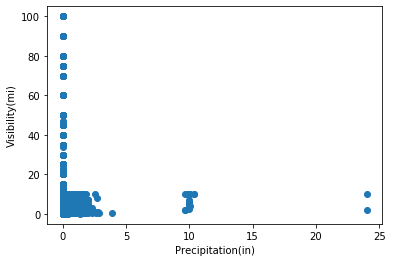

In [39]:
plt.scatter(x=Precipitation_Visibility['Precipitation(in)']
         ,y=Precipitation_Visibility['Visibility(mi)'])
plt.xlabel('Precipitation(in)')
plt.ylabel('Visibility(mi)')
plt.show()

In [33]:
Precipitation_Visibility.columns

Index(['Unnamed: 0', 'ID', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [60]:
data.isnull().sum()

Unnamed: 0                    0
ID                            0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
City                         85
County                        0
State                         0
Zipcode                     768
Country                       0
Timezone                   2183
Airport_Code               5754
Weather_Timestamp         30389
Temperature(F)            41602
Wind_Chill(F)            281803
Humidity(%)               43836
Pressure(in)              35499
Visibility(mi)            42201
Wind_Direction            44253
Wind_Speed(mph)           94724
Precipitation(in)             0
Weather_Condition         42358
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit 

# 4.白天和夜晚和嚴重性的關係

In [11]:
data['Sunrise_Sunset'].value_counts()

Day      1086819
Night     618622
Name: Sunrise_Sunset, dtype: int64

In [12]:
day = data[data['Sunrise_Sunset'] == 'Day']
night = data[data['Sunrise_Sunset'] == 'Night']

In [13]:
day_low = day[day['Severity'] == '輕度']
day_high = day[day['Severity'] == '重度']
night_low = night[night['Severity'] == '輕度']
night_hight = night[night['Severity'] == '重度']

In [14]:
len(day_low) / len(day)

0.8985212809124611

In [15]:
len(night_low) / len(night)

0.9008748476452503

In [16]:
len(night_low) / len(night) - len(day_low) / len(day)

0.002353566732789192

In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [10]:
data['Weather_Condition']

0                  Smoke
1                   Haze
2          Mostly Cloudy
3                  Clear
4          Mostly Cloudy
               ...      
1707200             Fair
1707201             Fair
1707202           Cloudy
1707203    Partly Cloudy
1707204           Cloudy
Name: Weather_Condition, Length: 1707205, dtype: object